# Clustering using k-means algorithm

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# retrieving dataset using pandas
file_path = "\annotations.csv"
df = pd.read_csv(file_path)
df.head() 

,x y
0,41 35
1,41 44
2,56 58
3,114 116
4,23 23


In [ ]:
# organizing data 

df_updated = []
for i in range(len(df)):
    x = df.iloc[i]['x y']
    x = list(map(eval, x.split(' ')))
    df_updated.append(x)
df_new = pd.DataFrame (df_updated, columns = ['x', 'y'])
df_new

,x,y
0,41,35
1,41,44
2,56,58
3,114,116
4,23,23
...,...,...
661,59,51
662,33,33
663,32,32
664,24,24


In [ ]:
#testing
train = df_new.sample(frac=0.8,random_state=200)
test = df_new.drop(train.index)
print(len(train),len(test))

533 133


In [ ]:
train.values

array([[34, 34],
       [24, 22],
       [32, 32],
       ...,
       [63, 64],
       [22, 22],
       [23, 22]], dtype=int64)

In [ ]:
#clustering
model = KMeans(3) #number of clusters
model.fit(df_new)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
#clusters (result of clustering)
identified_clusters = model.fit_predict(df_new)
identified_clusters

array([0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,

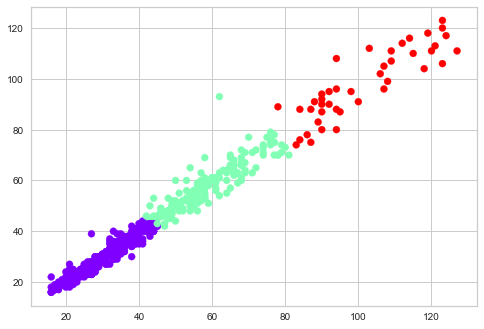

In [ ]:
#scatterplot of the result
data_with_clusters = df_new.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['x'],data_with_clusters['y'],c=data_with_clusters['Clusters'],cmap='rainbow')